**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [112]:
import numpy as np
import pandas as pd
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
#implement elbow method from scratch
def elbow(X):
    km = Kmeans(X)
    eps = []
    for k in range(2,20):
        eps.append(np.array(km.start(k,15)).min())
    
    plt.plot(list(range(2,20)),eps)

In [294]:
#implement silhouette method from scratch
def silhouette(X):
    km = Kmeans(X)
    res = []
    for k in range(2,15):
        km.start(k,10)        
        Ans = np.array([])
        for key,points in km.clusters.items():
            points = np.array(points)
            a = (km.get_euc_dist(points,points).sum(axis = 1) )/ (len(points) - 1)
            lis = []
            b = np.array(np.ones(len(points)) * np.inf)
            for k1,p in km.clusters.items():
                if(k1 == key):
                    continue
                p = np.array(p)
                b = np.amin(np.append(b.reshape(len(points),1),np.mean(km.get_euc_dist(points,p),axis = 1).reshape(len(points),1),axis=1),axis=1)
            ans = ((b - a) / (np.amax(np.append(a.reshape(len(points),1),b.reshape(len(points),1),axis = 1),axis = 1)))
            Ans = np.append(Ans,ans,axis=0)
        
        res.append(np.mean(Ans))
    return res
        
                
                    

In [226]:
#implement Kmeans from scratch
class Kmeans:

    def __init__(self,X):
        self.X = self.preprocess(X.copy())
        
    def preprocess(self,X):
        for x in X.T:
            avg = x.mean()
            xrange = np.amax(x) - np.amin(x) + 1
            x-=avg
            x/=xrange
        return X

    def get_centroids(self,k):
        centroid_idx = np.random.choice(range(len(self.X)), k, replace=False)
        self.centroid = self.X[centroid_idx]
    
    def get_euc_dist(self,A,B):
        return np.sum(np.square(B),axis=1) + np.sum(np.square(A),axis=1)[:,np.newaxis] -2*np.dot(A,B.T)

    def get_clusters(self):
        nearest_clr_idx = np.argmin(self.get_euc_dist(self.X,self.centroid),axis = 1)
        clusters = {}
        for i in range(len(self.centroid)):
            clusters[i] = []
            
        for i in range(len(nearest_clr_idx)):
            clusters[nearest_clr_idx[i]].append(self.X[i])
        return clusters
    
    def get_dist_from_centroid(self,clusters):
        self.intra = []
        for key,points in clusters.items():
            points = np.array(points)
            self.intra.append(self.get_euc_dist(points,np.array(self.centroid[key:key+1])).sum())
        return sum(self.intra)
            
    def start(self,k,itr):
        eps = []
        self.get_centroids(k)
        for _ in range(itr):
            clrs = self.get_clusters()
            eps.append(self.get_dist_from_centroid(clrs))
            self.centroid = np.array([np.mean(clrs[cl_id], axis=0,dtype=self.X.dtype) for cl_id in sorted(clrs.keys())])
        self.clusters = self.get_clusters()
        eps.append(self.get_dist_from_centroid(self.clusters))
        return eps
        

  

In [ ]:
#implement Kmeans++ from scratch
class Kmeansplusplus:

  def __init__(self):
    

 

In [9]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [230]:
# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]*trainX.shape[2]))
trainX.shape

(60000, 784)

In [221]:
indices = np.random.choice(range(60000), 3000, replace=False)

In [222]:
tempX = trainX[indices].astype(float)
tempY = trainy[indices].astype(float)

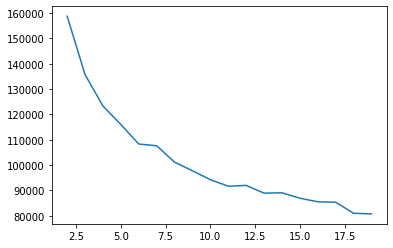

In [229]:
elbow(tempX)

In [88]:
"""
We can see that the elbow is forming at k = 5 thus the ideal k would be 5

"""

In [224]:
km = Kmeans(tempX)
eps = km.start(5,15)

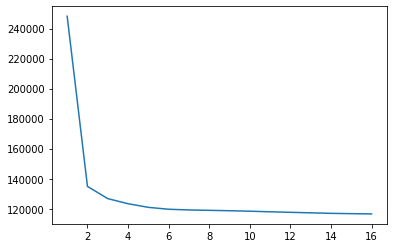

In [225]:
plt.plot(range(1,17),eps)

In [295]:
res =  silhouette(tempX)

/home/zcruz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


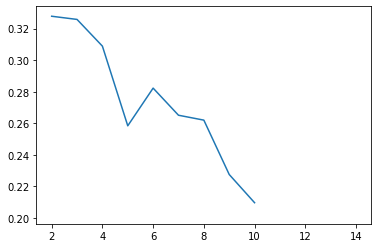

In [297]:
plt.plot(range(2,15),res)